# Week 3 - class (answers)

We'll go through the 2014 Algorithms and Complexity exam, Q2 (below). For part (b), rather than writing pseudocode I'd like you to write code that implements it. I've included templates in Python and C++ below. I'd suggest you have a go at least at the coding part before the class.

## 2014 Q2

**Note: the original exam question had a mistake on it, use this version.**

Consider an array $A=[a_1,a_2,\ldots,a_n]$ containing $n$ elements. The only operation you are allowed is to check whether two elements are equal, i.e. "is $a_i$ equal to $a_j$?" and these will be the elementary operations.

In what follows, assume that $n$ is a power of 2, i.e. $n=2^k$ for some positive integer $k$.

An element $x$ is the *majority* element in $A$ if it occurs more than $n/2$ times in the array. So for example, $[1,2,1,1]$ (with $n=4$) has a majority element 1 because it occurs $3>n/2$ times. The array $[1,2,3,3]$ has no majority element: 3 occurs twice, but this isn't enough because it is not true that $2>n/2$.

We will consider two distinct algorithms for finding the majority element in a list.

**(a)** Let us first start with a naive approach. Describe, in words, what the different steps of the following algorithm do and derive the complexity of this algorithm in terms of elementary operations. **[ 5 ]**
    
```Python
def majority(A):
    n = len(A)
    for i in range(n):
        c = 0
        for j in range(n):
            if A[i]==A[j]:
                c = c+1
        if c>n/2:
            return A[i]
    return None
```

**(b)** Derive in words or using pseudocode, a divide-and-conquer recursive algorithm for finding the majority element in $A$. **[ 10 ]**

> Hint: You need to distinguish a number of scenarios depending on whether there is a majority element in the first and/or second array of the divide-and-conquer procedure.

**(c)** Compute the complexity of the algorithm you described in part (b). **[ 5 ]**

## Python template

In [1]:
def majority(x):
    # should return an index i of the majority element
    # if there is one, so that x[i] is the majority element
    # or -1 if there is no majority element
    return -1 # replace this with your solution

x1 = [1,2,3,4,3,2,2,2,2,2,2,3,2,1,2,3]
x2 = [8,9,10,10]
maj1 = majority(x1)
maj2 = majority(x2)
print(maj1, maj2, x1[maj1])
if maj1==-1:
    print("Wrong! (1)")
elif maj1>=len(x1):
    print("Wrong! (2)")
elif x1[maj1]!=2:
    print("Wrong! (3)")
elif maj2!=-1:
    print("Wrong! (4)")
else:
    print("You got it!")

-1 -1 3
Wrong! (1)


## C++ template

```C++
#include<iostream>
#include<vector>
#include<algorithm>

using namespace std;

int majority(vector<int> &x)
{
    // should return i where either i==-1 if there is no majority
    // element, or if 0<=i<x.size() where x[i] is the majority
    // element.
}

#define WRONG { cout << "Nope!" << endl; return 0; }

int main(void)
{
    vector<int> x1{1,2,3,4,3,2,2,2,2,2,2,3,2,1,2,3};
    vector<int> x2{8,9,10,10};
    int maj1 = majority(x1);
    int maj2 = majority(x2);
    //cout << maj1 << " " << maj2 << endl;
    if(maj1==-1) WRONG;
    if(maj1>=x1.size()) WRONG;
    if(x1[maj1]!=2) WRONG;
    if(maj2!=-1) WRONG;
    cout << "You got it!" << endl;
    return 0;
}
```

# Answers

**(a)** There are two nested loops over $n$ items and all operations are $O(1)$ so the total cost is $n^2\times O(1)=O(n^2)$.

**(b)** Use the hint! We know that we are going to divide the array $A$ into two halves $A_1$ and $A_2$ each of size $n/2$ and find their majority elements $a_1$ or None, and $a_2$ or None (None if either or both arrays have no majority element).

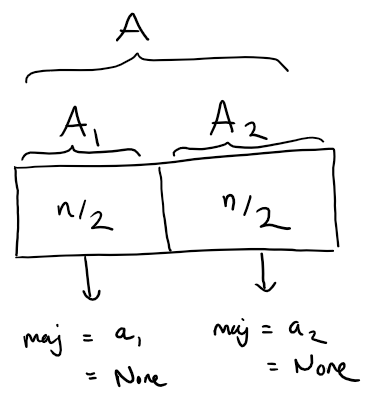

Now what can the answer be? Well, let's guess that the candidates for majority element of the whole array are $a_1$, $a_2$ or None because those are the obvious candidates. We first write code that checks how many times $a_1$ appears in $A$. If it appears more than $n/2$ times then we're done and we return that value. Same for $a_2$. If neither of them are majority elements, we return None.

Can this miss a solution? If so, there would be an element $x\in A$ such that $x$ is not a majority element of either $A_1$ or $A_2$ but $x$ is a majority element of $A$.

Write $n_0$ for the number of times $x$ appears in $A$, $n_1$ for the number of times it appears in $A_1$ and $n_2$ for the number of times it appears in $A_2$.

Since $A$ is $A_1$ joined to $A_2$ we get $n_0=n_1+n_2$.

Since $x$ is a majority element of $A$ we get $n_0>n/2$.

Since $x$ is not a majority element of $A_1$ we get $n_1\leq n/4$. Since $x$ is not a majority element of $A_2$ we get $n_2\leq n/4$. Adding those together we get $n_1+n_2\leq n/2$. But $n_1+n_2=n_0>n/2$ because $x$ is a majority element of $A$. This proof by contradiction shows that there cannot be a majority element $x$ of $A$ that isn't a majority element of either of the two halves.

To see the full code written out, look below.

**(c)** To compute the time complexity, let $T(n)$ be the number of time steps running the code on an array of size $n$. The functions recursively calls itself on data of size $n/2$ twice (for the two halves), and it has to scan through the array $A$ twice to count how many times $a_1$ and $a_2$ appear. This is one for loop (or two sequential for loops) over $n$ items, so it takes $O(n)$. So we get that $T(n)=2T(n/2)+O(n)$. This is $a=b=2, d=1$ and $\log_ba=\log_22=1=d$ so $T(n)=O(n\log n)$.


## Python code

In [1]:
def majority(x):
    n = len(x)
    if n==0:
        return -1
    if n==1:
        return 0
    mid = n//2 # integer divide
    L = majority(x[:mid])
    R = majority(x[mid:])
    if L>=0:
        if sum(y==x[L] for y in x)>n/2:
            return L
    if R>=0:
        if sum(y==x[R+mid] for y in x)>n/2:
            return R+mid
    return -1

x1 = [1,2,3,4,3,2,2,2,2,2,2,3,2,1,2,3]
x2 = [8,9,10,10]
maj1 = majority(x1)
maj2 = majority(x2)
print(maj1, maj2, x1[maj1])
if maj1==-1:
    print("Wrong! (1)")
elif maj1>=len(x1):
    print("Wrong! (2)")
elif x1[maj1]!=2:
    print("Wrong! (3)")
elif maj2!=-1:
    print("Wrong! (4)")
else:
    print("You got it!")

8 -1 2
You got it!


## C++ code

```C++
#include<iostream>
#include<vector>
#include<algorithm>

using namespace std;

int majority(vector<int> &x, int start=0, int end=-1)
{
    if(end==-1) end = x.size();
    int n = end-start;
    if(n==0) return -1; // empty list, no majority element
    if(n==1) return start; // index of majority element if only 1 element
    int mid = start + n/2;

    int L = majority(x, start, mid);          // T(n/2)
    int R = majority(x, mid, end);            // T(n/2)

    //cout << start << " " << mid << " " << end << " " << L << " " << R << endl;
    if(L>=0)
    {
        if( count(x.begin()+start, x.begin()+end, x[L]) > n/2) return L;   // O(n)
    }
    if(R>=0)
    {
        if( count(x.begin()+start, x.begin()+end, x[R]) > n/2) return R;   // O(n)
    }
    return -1;
}

#define WRONG { cout << "Nope!" << endl; return 0; }

int main(void)
{
    vector<int> x1{1,2,3,4,3,2,2,2,2,2,2,3,2,1,2,3};
    vector<int> x2{8,9,10,10};
    int maj1 = majority(x1);
    int maj2 = majority(x2);
    //cout << maj1 << " " << maj2 << endl;
    if(maj1==-1) WRONG;
    if(maj1>=x1.size()) WRONG;
    if(x1[maj1]!=2) WRONG;
    if(maj2!=-1) WRONG;
    cout << "You got it!" << endl;
    return 0;
}
```